<a href="https://colab.research.google.com/github/Nusrat2002m/CNN-Practice/blob/main/Small_Image_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

**Load CIFAR-10 dataset**

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

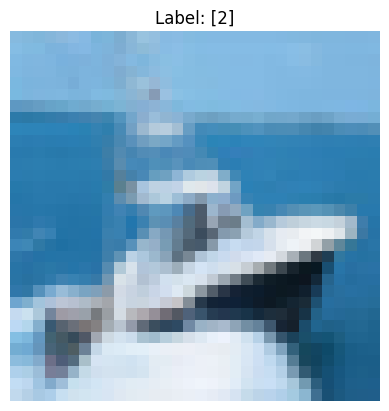

In [9]:
plt.imshow(X_train[8])
plt.title(f"Label: {y_train[6]}")
plt.axis('off')
plt.show()

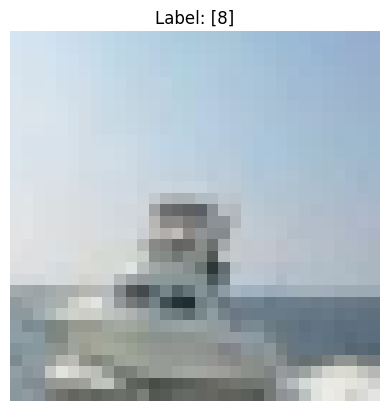

In [10]:
plt.imshow(X_train[100], cmap='gray')
plt.title(f"Label: {y_train[100]}")
plt.axis('off')
plt.show()

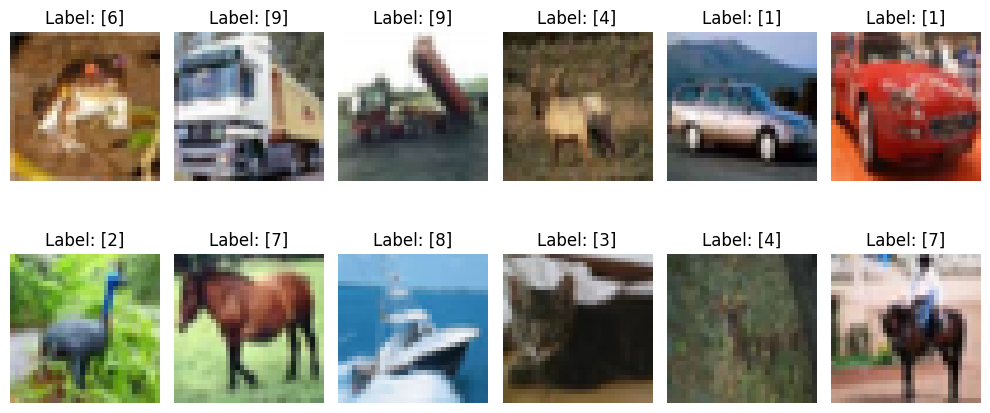

In [11]:
plt.figure(figsize=(10, 5))

for i in range(12):
    plt.subplot(2, 6, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**Normalize pixel values to the range [0, 1]**

In [12]:
X_train, X_test = X_train / 255.0, X_test / 255.0

**Convert labels to one-dimensional arrays**

In [13]:
y_train.shape

(50000, 1)

In [14]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [15]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

**Create the model**

In [16]:
cnn_model = models.Sequential()

**First Convolutional Block**


In [17]:
cnn_model.add(layers.Conv2D(filters= 32, kernel_size= (3, 3),
                            activation='relu',
                            input_shape=(32, 32, 3)))

cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2))) #downsampling

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Second Convolutional Block**

In [18]:
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))

**Third Convolutional Block**

In [19]:
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.BatchNormalization())

**Fully Connected Layers**

In [20]:
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax'))

**Print model summary**

In [21]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

**Compile the Model**

In [22]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [24]:
history = cnn_model.fit(X_train, y_train,
                        epochs=15,
                        batch_size=64,
                        validation_split=0.2,
                        verbose=2)

Epoch 1/15
625/625 - 68s - 108ms/step - accuracy: 0.8421 - loss: 0.4474 - val_accuracy: 0.7099 - val_loss: 0.9758
Epoch 2/15
625/625 - 82s - 130ms/step - accuracy: 0.8498 - loss: 0.4186 - val_accuracy: 0.7155 - val_loss: 0.9554
Epoch 3/15
625/625 - 66s - 105ms/step - accuracy: 0.8627 - loss: 0.3836 - val_accuracy: 0.6980 - val_loss: 1.1331
Epoch 4/15
625/625 - 67s - 108ms/step - accuracy: 0.8751 - loss: 0.3505 - val_accuracy: 0.7329 - val_loss: 0.9366
Epoch 5/15
625/625 - 82s - 131ms/step - accuracy: 0.8816 - loss: 0.3311 - val_accuracy: 0.7023 - val_loss: 1.0846
Epoch 6/15
625/625 - 87s - 140ms/step - accuracy: 0.8857 - loss: 0.3169 - val_accuracy: 0.7326 - val_loss: 1.0341
Epoch 7/15
625/625 - 79s - 127ms/step - accuracy: 0.8984 - loss: 0.2845 - val_accuracy: 0.7049 - val_loss: 1.2442
Epoch 8/15
625/625 - 68s - 109ms/step - accuracy: 0.8985 - loss: 0.2817 - val_accuracy: 0.7229 - val_loss: 1.1065
Epoch 9/15
625/625 - 82s - 131ms/step - accuracy: 0.9062 - loss: 0.2638 - val_accuracy: 

***Evaluate on test data***

In [25]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 - 5s - 15ms/step - accuracy: 0.7228 - loss: 1.2980
Test Accuracy: 0.72


In [26]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


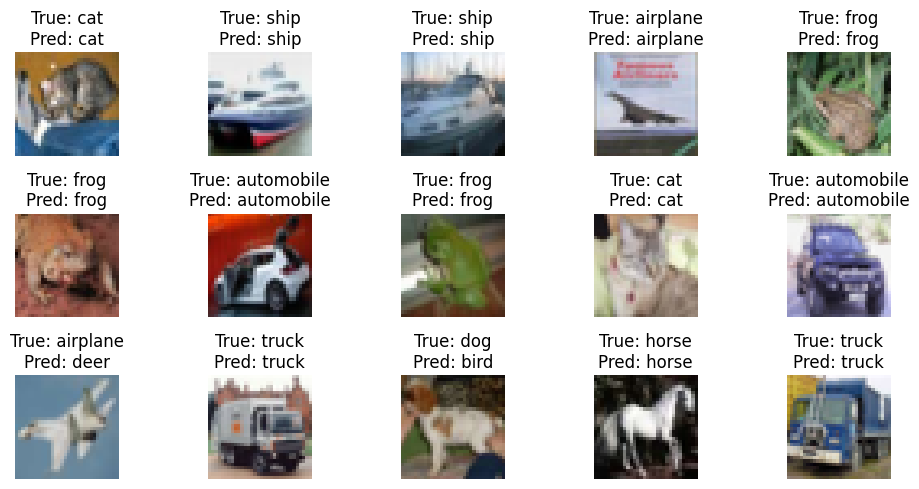

In [27]:
sample_images = X_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(cnn_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**Plot accuracy and loss**

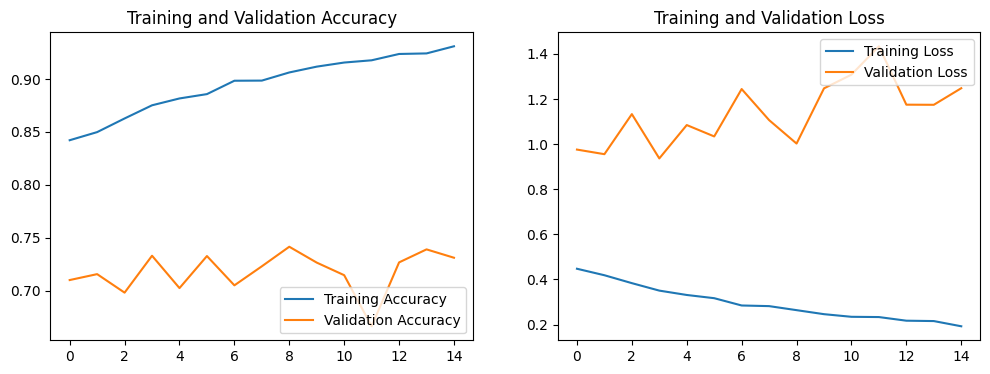

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


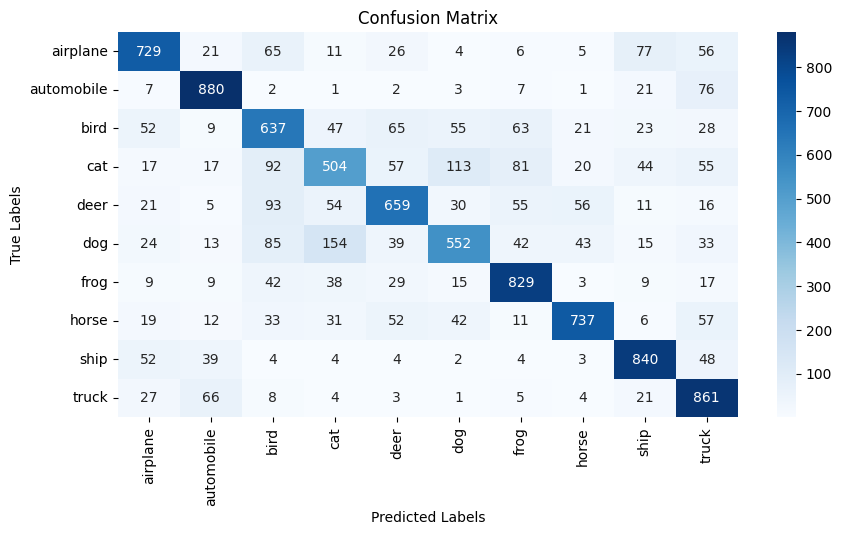

In [29]:
y_pred = np.argmax(cnn_model.predict(X_test), axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Generate a classification report**

In [30]:
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.76      0.73      0.75      1000
  automobile       0.82      0.88      0.85      1000
        bird       0.60      0.64      0.62      1000
         cat       0.59      0.50      0.55      1000
        deer       0.70      0.66      0.68      1000
         dog       0.68      0.55      0.61      1000
        frog       0.75      0.83      0.79      1000
       horse       0.83      0.74      0.78      1000
        ship       0.79      0.84      0.81      1000
       truck       0.69      0.86      0.77      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



**Save the Model**

In [31]:
cnn_model.save('cnn_cifar10_model.h5')
print("Model saved as 'cnn_cifar10_model.h5'")

Model saved as 'cnn_cifar10_model.h5'


**Load and Use the Model**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


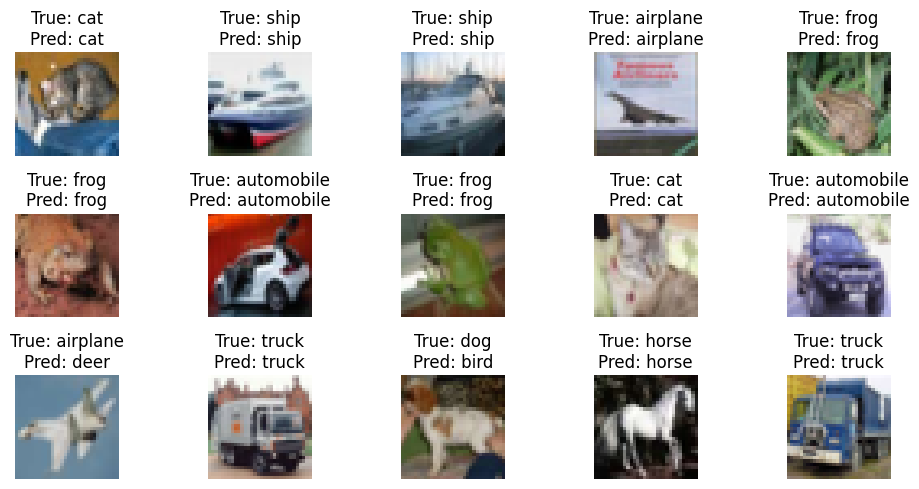

In [32]:
loaded_model = tf.keras.models.load_model('cnn_cifar10_model.h5')

sample_images = X_test[:15]
sample_labels = y_test[:15]
predictions = np.argmax(loaded_model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[predictions[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()